In [1]:
import numpy as np
import cv2

import tensorflow as tf

In [2]:
interpreter = tf.lite.Interpreter(model_path='./model/blazepose.tflite')

In [3]:
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [17]:
input_details

[{'name': 'input',
  'index': 0,
  'shape': array([  1, 128, 128,   3]),
  'shape_signature': array([  1, 128, 128,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [18]:
output_details

[{'name': 'regressors',
  'index': 270,
  'shape': array([  1, 896,  12]),
  'shape_signature': array([  1, 896,  12]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'classificators',
  'index': 269,
  'shape': array([  1, 896,   1]),
  'shape_signature': array([  1, 896,   1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [4]:
height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]
print(height, width)

128 128


In [5]:
raw_image = cv2.imread("images/photo.jpg")
image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

In [6]:
# 画像の整形
raw_shape = image.shape[:2]
image = cv2.resize(image, (width, height)).reshape((1, width, height, 3)).astype(np.float32)/127.5-1.0

In [7]:
interpreter.set_tensor(input_details[0]['index'], image)

In [8]:
interpreter.invoke()

In [19]:
regressors = interpreter.get_tensor(output_details[0]['index'])
classificators = interpreter.get_tensor(output_details[1]['index'])

In [20]:
regressors.shape

(1, 896, 12)

In [23]:
regressors[0,0]

array([  0.7097726,   1.8399929,  38.59993  ,  38.63625  ,   7.0661793,
         3.1078036, -11.375038 , -12.007059 ,   1.2545903,  -1.1916072,
       -10.782391 , -12.608197 ], dtype=float32)

In [36]:
import matplotlib.pyplot as plt

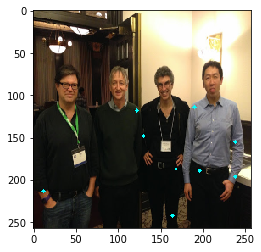

In [37]:
plt.imshow(show_img)